# Physics-informed neural networks for the SIR model

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from src.data import SirModel
from src.visualisation import plot_param_process, plot_progress, plot_error

In [2]:
save_dir = '../figures/sir/pinn'

## SIR model
First of all define the number of data $N$, the end time $T$ (note that the time intervall is $[0,T]$) and the varianz $\sigma_z$ of the the centered normal distributed noise term $z \sim \mathcal{N}(0, \sigma_z)$.

In [3]:
number_of_data = 100
end_time = 99
noise = 5

Generate the true unnoised values of the SIR model and plot them in 2d.

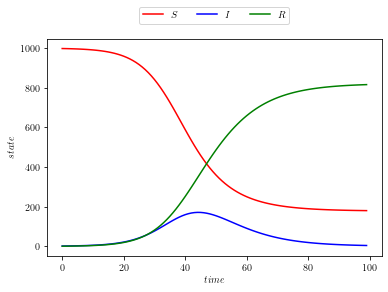

In [4]:
sir_true = SirModel(number_of_data=number_of_data,
                    end_time=end_time,
                    noise_variance=0.0,
                    param = {'beta': 0.3, 'gamma': 1/7},
                    initial_condition={'t': 0, 'y_1': 999.0, 'y_2': 1.0, 'y_3': 0.0})
sir_true.set_data()
sir_true.plot_data()

In [5]:
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (16, 8),
                     'text.usetex': True,
                     'text.latex.preamble': r'\usepackage{lmodern}', 
                     'font.weight': 'bold', 
                     "axes.labelweight": "bold"})

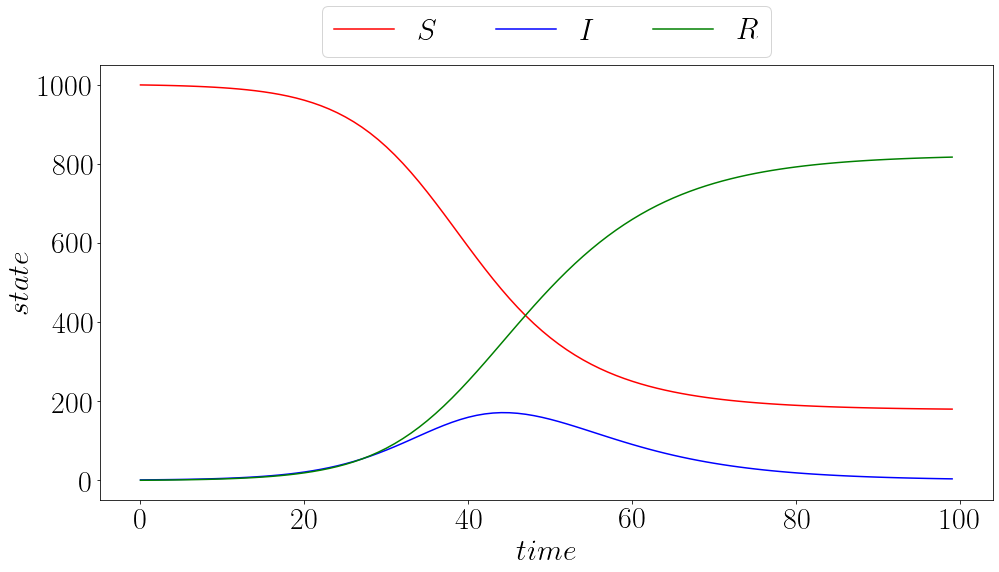

In [6]:
sir_true.plot_data(save_dir=save_dir)
sir_true.plot_data()

Now the noisy data is also generated. The model is then trained on this data.

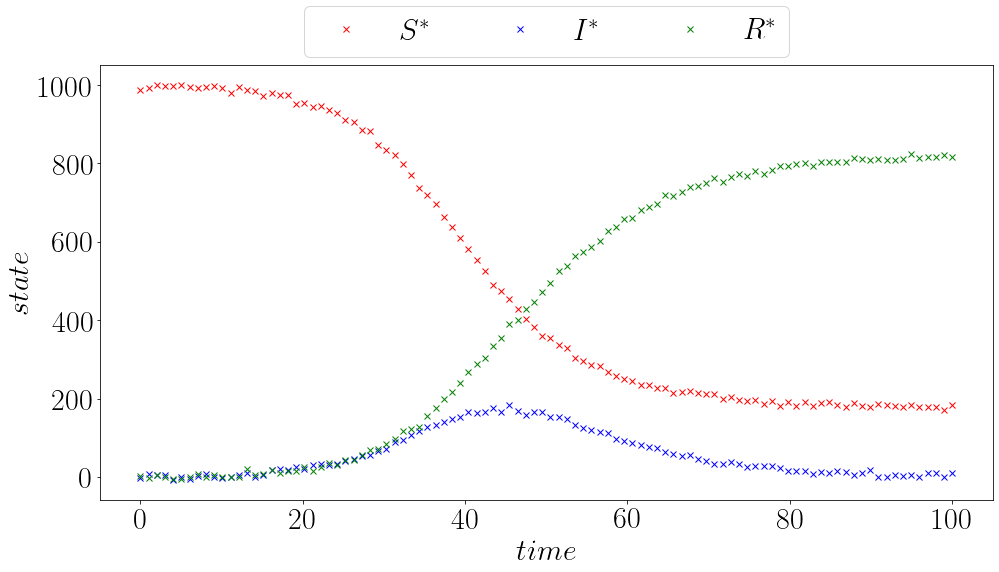

In [7]:
sir_noise = SirModel(number_of_data=100,
                     end_time=100,
                     noise_variance=noise,
                     param = {'beta': 0.3, 'gamma': 1/7},
                     initial_condition={'t': 0, 'y_1': 999.0, 'y_2': 1.0, 'y_3': 0.0})
sir_noise.set_data()
sir_noise.plot_data(save_dir=save_dir)
sir_noise.plot_data()

The deviation between true and noisy values is shown in the next figure.

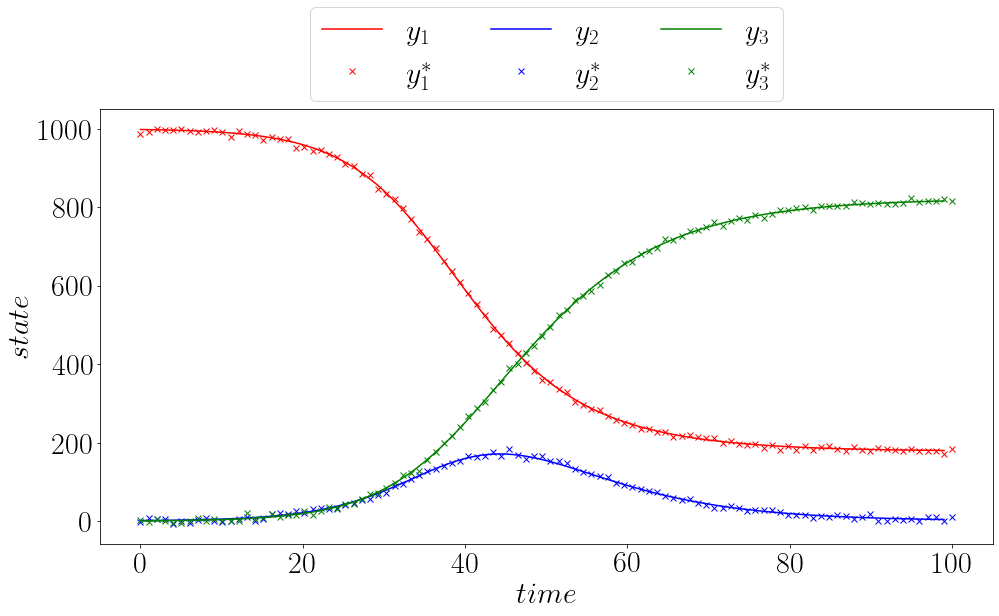

In [8]:
colors = ['r', 'b', 'g']
for i, col in enumerate(sir_true.data.columns):
    plt.plot(sir_true.data[col], colors[i])
    plt.plot(sir_noise.data[col], f"{colors[i]}x")
    plt.ylabel(r"$state$")
    plt.xlabel(r"$time$")
    legend = [r"$y_1$", r"$y^{\ast}_1$", r"$y_2$", r"$y^{\ast}_2$", r"$y_3$", r"$y^{\ast}_3$"]
    plt.legend(legend, ncol=3, loc='upper center',  bbox_to_anchor=(0.5, 1.27))
plt.savefig(f"{save_dir}/sir_2d_noise_with_true")
plt.show()

## Physics-informed neural network
Since the data are already available, the physics-informed neural network can now be created.

In [9]:
from src.pinn import PhysicsInformedNeuralNet

Using backend: pytorch



In [10]:
pinn = PhysicsInformedNeuralNet(sir_noise)

population: 1000.0


Now it just needs to be trained.

In [11]:
loss_history = pinn.train(epochs=50000, display_every=100, 
                          loss_weights=[1, 1e-2, 1, 1e-6, 1e-1, 1e-3, 1e-6, 1e-2, 1e-5])

Compiling model...
'compile' took 0.000096 s

Training model...

Step      Train loss                                                                                    Test loss                                                                                     Test metric
0         [7.95e-05, 1.22e-05, 1.18e-03, 9.98e-01, 1.00e-01, 0.00e+00, 3.79e-01, 6.58e+01, 2.93e+00]    [7.95e-05, 1.22e-05, 1.18e-03, 9.98e-01, 1.00e-01, 0.00e+00, 3.79e-01, 6.58e+01, 2.93e+00]    []  
100       [3.96e-04, 8.27e-03, 3.29e-02, 9.98e-01, 2.24e-04, 1.18e-05, 3.78e-01, 4.17e+01, 2.89e+00]    [3.96e-04, 8.27e-03, 3.29e-02, 9.98e-01, 2.24e-04, 1.18e-05, 3.78e-01, 4.17e+01, 2.89e+00]    []  
200       [3.01e-04, 1.05e-02, 2.19e-02, 9.97e-01, 1.03e-03, 1.05e-04, 3.78e-01, 3.45e+01, 2.86e+00]    [3.01e-04, 1.05e-02, 2.19e-02, 9.97e-01, 1.03e-03, 1.05e-04, 3.78e-01, 3.45e+01, 2.86e+00]    []  
300       [3.93e-04, 1.43e-02, 3.34e-02, 9.97e-01, 1.36e-03, 3.86e-04, 3.78e-01, 3.03e+01, 2.84e+00]    [3.93e-04, 1

4000      [2.92e-03, 1.62e-01, 4.97e-03, 9.37e-01, 1.38e-06, 3.14e-04, 3.59e-01, 1.68e-01, 2.55e+00]    [2.92e-03, 1.62e-01, 4.97e-03, 9.37e-01, 1.38e-06, 3.14e-04, 3.59e-01, 1.68e-01, 2.55e+00]    []  
4100      [3.00e-03, 1.58e-01, 4.36e-03, 9.31e-01, 6.67e-07, 2.42e-04, 3.58e-01, 1.66e-01, 2.54e+00]    [3.00e-03, 1.58e-01, 4.36e-03, 9.31e-01, 6.67e-07, 2.42e-04, 3.58e-01, 1.66e-01, 2.54e+00]    []  
4200      [2.93e-03, 1.55e-01, 4.00e-03, 9.24e-01, 5.42e-07, 1.81e-04, 3.56e-01, 1.66e-01, 2.52e+00]    [2.93e-03, 1.55e-01, 4.00e-03, 9.24e-01, 5.42e-07, 1.81e-04, 3.56e-01, 1.66e-01, 2.52e+00]    []  
4300      [2.85e-03, 1.51e-01, 3.91e-03, 9.18e-01, 6.59e-06, 1.33e-04, 3.54e-01, 1.67e-01, 2.51e+00]    [2.85e-03, 1.51e-01, 3.91e-03, 9.18e-01, 6.59e-06, 1.33e-04, 3.54e-01, 1.67e-01, 2.51e+00]    []  
4400      [2.67e-03, 1.47e-01, 3.79e-03, 9.11e-01, 4.21e-07, 9.27e-05, 3.52e-01, 1.64e-01, 2.49e+00]    [2.67e-03, 1.47e-01, 3.79e-03, 9.11e-01, 4.21e-07, 9.27e-05, 3.52e-01, 1.64e-01, 2.4

8100      [4.56e-03, 4.21e-02, 8.17e-03, 5.69e-01, 8.00e-07, 1.24e-04, 2.46e-01, 1.81e-01, 1.54e+00]    [4.56e-03, 4.21e-02, 8.17e-03, 5.69e-01, 8.00e-07, 1.24e-04, 2.46e-01, 1.81e-01, 1.54e+00]    []  
8200      [4.04e-03, 3.82e-02, 5.79e-03, 5.60e-01, 3.84e-05, 9.98e-05, 2.42e-01, 1.48e-01, 1.51e+00]    [4.04e-03, 3.82e-02, 5.79e-03, 5.60e-01, 3.84e-05, 9.98e-05, 2.42e-01, 1.48e-01, 1.51e+00]    []  
8300      [1.61e-03, 3.79e-02, 5.93e-03, 5.52e-01, 3.30e-06, 9.94e-05, 2.40e-01, 1.52e-01, 1.47e+00]    [1.61e-03, 3.79e-02, 5.93e-03, 5.52e-01, 3.30e-06, 9.94e-05, 2.40e-01, 1.52e-01, 1.47e+00]    []  
8400      [3.32e-03, 3.62e-02, 6.22e-03, 5.43e-01, 7.11e-05, 6.28e-05, 2.37e-01, 1.53e-01, 1.43e+00]    [3.32e-03, 3.62e-02, 6.22e-03, 5.43e-01, 7.11e-05, 6.28e-05, 2.37e-01, 1.53e-01, 1.43e+00]    []  
8500      [2.39e-03, 3.51e-02, 6.79e-03, 5.35e-01, 1.93e-04, 9.72e-05, 2.33e-01, 1.58e-01, 1.40e+00]    [2.39e-03, 3.51e-02, 6.79e-03, 5.35e-01, 1.93e-04, 9.72e-05, 2.33e-01, 1.58e-01, 1.4

12200     [2.16e-02, 3.57e-02, 3.01e-02, 3.23e-01, 4.29e-05, 1.11e-07, 1.52e-01, 1.70e-01, 4.40e-01]    [2.16e-02, 3.57e-02, 3.01e-02, 3.23e-01, 4.29e-05, 1.11e-07, 1.52e-01, 1.70e-01, 4.40e-01]    []  
12300     [9.35e-03, 3.62e-02, 1.14e-02, 3.18e-01, 1.08e-05, 3.56e-09, 1.51e-01, 1.51e-01, 4.20e-01]    [9.35e-03, 3.62e-02, 1.14e-02, 3.18e-01, 1.08e-05, 3.56e-09, 1.51e-01, 1.51e-01, 4.20e-01]    []  
12400     [1.11e-02, 3.69e-02, 1.22e-02, 3.14e-01, 2.62e-05, 8.31e-06, 1.49e-01, 1.49e-01, 4.03e-01]    [1.11e-02, 3.69e-02, 1.22e-02, 3.14e-01, 2.62e-05, 8.31e-06, 1.49e-01, 1.49e-01, 4.03e-01]    []  
12500     [5.63e-02, 3.58e-02, 3.40e-02, 3.09e-01, 2.01e-05, 5.09e-06, 1.46e-01, 1.98e-01, 3.95e-01]    [5.63e-02, 3.58e-02, 3.40e-02, 3.09e-01, 2.01e-05, 5.09e-06, 1.46e-01, 1.98e-01, 3.95e-01]    []  
12600     [1.22e-02, 3.75e-02, 2.48e-02, 3.05e-01, 3.34e-06, 1.19e-07, 1.46e-01, 1.74e-01, 3.67e-01]    [1.22e-02, 3.75e-02, 2.48e-02, 3.05e-01, 3.34e-06, 1.19e-07, 1.46e-01, 1.74e-01, 3.6

16300     [1.11e-03, 4.33e-02, 2.20e-03, 1.81e-01, 2.85e-06, 8.69e-05, 9.37e-02, 1.43e-01, 8.39e-02]    [1.11e-03, 4.33e-02, 2.20e-03, 1.81e-01, 2.85e-06, 8.69e-05, 9.37e-02, 1.43e-01, 8.39e-02]    []  
16400     [1.15e-03, 4.36e-02, 1.02e-03, 1.79e-01, 2.63e-06, 8.71e-05, 9.26e-02, 1.41e-01, 8.14e-02]    [1.15e-03, 4.36e-02, 1.02e-03, 1.79e-01, 2.63e-06, 8.71e-05, 9.26e-02, 1.41e-01, 8.14e-02]    []  
16500     [2.42e-02, 4.60e-02, 1.45e-02, 1.76e-01, 2.50e-06, 8.26e-05, 8.98e-02, 2.24e-01, 8.44e-02]    [2.42e-02, 4.60e-02, 1.45e-02, 1.76e-01, 2.50e-06, 8.26e-05, 8.98e-02, 2.24e-01, 8.44e-02]    []  
16600     [9.44e-03, 4.41e-02, 9.52e-03, 1.74e-01, 2.69e-06, 1.07e-04, 9.04e-02, 1.41e-01, 7.56e-02]    [9.44e-03, 4.41e-02, 9.52e-03, 1.74e-01, 2.69e-06, 1.07e-04, 9.04e-02, 1.41e-01, 7.56e-02]    []  
16700     [1.01e-03, 4.33e-02, 1.51e-03, 1.72e-01, 2.49e-06, 8.28e-05, 8.96e-02, 1.41e-01, 7.19e-02]    [1.01e-03, 4.33e-02, 1.51e-03, 1.72e-01, 2.49e-06, 8.28e-05, 8.96e-02, 1.41e-01, 7.1

20400     [6.81e-04, 3.00e-02, 5.61e-04, 1.08e-01, 3.37e-06, 2.82e-05, 6.02e-02, 1.34e-01, 2.73e-02]    [6.81e-04, 3.00e-02, 5.61e-04, 1.08e-01, 3.37e-06, 2.82e-05, 6.02e-02, 1.34e-01, 2.73e-02]    []  
20500     [6.82e-04, 2.99e-02, 5.22e-04, 1.06e-01, 3.48e-06, 2.60e-05, 5.96e-02, 1.33e-01, 2.66e-02]    [6.82e-04, 2.99e-02, 5.22e-04, 1.06e-01, 3.48e-06, 2.60e-05, 5.96e-02, 1.33e-01, 2.66e-02]    []  
20600     [7.87e-02, 3.19e-02, 1.26e-01, 1.05e-01, 6.65e-06, 3.29e-05, 5.78e-02, 1.65e-01, 2.52e-02]    [7.87e-02, 3.19e-02, 1.26e-01, 1.05e-01, 6.65e-06, 3.29e-05, 5.78e-02, 1.65e-01, 2.52e-02]    []  
20700     [6.33e-04, 2.93e-02, 5.94e-04, 1.04e-01, 4.32e-06, 2.40e-05, 5.84e-02, 1.33e-01, 2.58e-02]    [6.33e-04, 2.93e-02, 5.94e-04, 1.04e-01, 4.32e-06, 2.40e-05, 5.84e-02, 1.33e-01, 2.58e-02]    []  
20800     [6.58e-04, 2.92e-02, 5.15e-04, 1.03e-01, 3.32e-06, 2.18e-05, 5.78e-02, 1.32e-01, 2.51e-02]    [6.58e-04, 2.92e-02, 5.15e-04, 1.03e-01, 3.32e-06, 2.18e-05, 5.78e-02, 1.32e-01, 2.5

24500     [1.22e-01, 2.08e-02, 8.91e-02, 6.70e-02, 6.18e-05, 2.05e-05, 3.63e-02, 2.73e-01, 1.80e-02]    [1.22e-01, 2.08e-02, 8.91e-02, 6.70e-02, 6.18e-05, 2.05e-05, 3.63e-02, 2.73e-01, 1.80e-02]    []  
24600     [4.57e-04, 2.06e-02, 3.54e-04, 6.62e-02, 1.12e-06, 4.74e-06, 3.77e-02, 1.38e-01, 1.52e-02]    [4.57e-04, 2.06e-02, 3.54e-04, 6.62e-02, 1.12e-06, 4.74e-06, 3.77e-02, 1.38e-01, 1.52e-02]    []  
24700     [3.71e-04, 2.07e-02, 3.50e-04, 6.52e-02, 1.19e-06, 4.51e-06, 3.73e-02, 1.37e-01, 1.49e-02]    [3.71e-04, 2.07e-02, 3.50e-04, 6.52e-02, 1.19e-06, 4.51e-06, 3.73e-02, 1.37e-01, 1.49e-02]    []  
24800     [6.42e-02, 2.18e-02, 3.63e-02, 6.43e-02, 1.97e-04, 4.01e-06, 3.56e-02, 1.90e-01, 1.57e-02]    [6.42e-02, 2.18e-02, 3.63e-02, 6.43e-02, 1.97e-04, 4.01e-06, 3.56e-02, 1.90e-01, 1.57e-02]    []  
24900     [4.93e-03, 1.99e-02, 4.37e-03, 6.40e-02, 1.44e-06, 3.87e-06, 3.65e-02, 1.41e-01, 1.52e-02]    [4.93e-03, 1.99e-02, 4.37e-03, 6.40e-02, 1.44e-06, 3.87e-06, 3.65e-02, 1.41e-01, 1.5

28600     [1.70e-04, 1.56e-02, 3.35e-04, 4.03e-02, 6.13e-07, 2.67e-08, 2.40e-02, 1.30e-01, 1.12e-02]    [1.70e-04, 1.56e-02, 3.35e-04, 4.03e-02, 6.13e-07, 2.67e-08, 2.40e-02, 1.30e-01, 1.12e-02]    []  
28700     [1.79e-04, 1.57e-02, 3.41e-04, 3.98e-02, 6.21e-07, 5.87e-08, 2.38e-02, 1.29e-01, 1.11e-02]    [1.79e-04, 1.57e-02, 3.41e-04, 3.98e-02, 6.21e-07, 5.87e-08, 2.38e-02, 1.29e-01, 1.11e-02]    []  
28800     [8.75e-03, 1.52e-02, 9.29e-03, 3.94e-02, 1.52e-06, 1.13e-07, 2.37e-02, 1.33e-01, 1.11e-02]    [8.75e-03, 1.52e-02, 9.29e-03, 3.94e-02, 1.52e-06, 1.13e-07, 2.37e-02, 1.33e-01, 1.11e-02]    []  
28900     [1.77e-04, 1.54e-02, 3.08e-04, 3.89e-02, 8.59e-07, 5.87e-08, 2.33e-02, 1.29e-01, 1.10e-02]    [1.77e-04, 1.54e-02, 3.08e-04, 3.89e-02, 8.59e-07, 5.87e-08, 2.33e-02, 1.29e-01, 1.10e-02]    []  
29000     [1.83e-04, 1.55e-02, 3.11e-04, 3.84e-02, 7.15e-07, 1.03e-07, 2.30e-02, 1.28e-01, 1.09e-02]    [1.83e-04, 1.55e-02, 3.11e-04, 3.84e-02, 7.15e-07, 1.03e-07, 2.30e-02, 1.28e-01, 1.0

32700     [2.48e-04, 1.24e-02, 3.09e-04, 2.38e-02, 7.05e-07, 2.13e-06, 1.48e-02, 1.20e-01, 7.85e-03]    [2.48e-04, 1.24e-02, 3.09e-04, 2.38e-02, 7.05e-07, 2.13e-06, 1.48e-02, 1.20e-01, 7.85e-03]    []  
32800     [1.70e-04, 1.29e-02, 1.96e-04, 2.35e-02, 1.06e-06, 1.63e-06, 1.47e-02, 1.18e-01, 7.80e-03]    [1.70e-04, 1.29e-02, 1.96e-04, 2.35e-02, 1.06e-06, 1.63e-06, 1.47e-02, 1.18e-01, 7.80e-03]    []  
32900     [4.07e-04, 1.33e-02, 4.68e-04, 2.32e-02, 3.49e-06, 5.47e-07, 1.45e-02, 1.16e-01, 7.82e-03]    [4.07e-04, 1.33e-02, 4.68e-04, 2.32e-02, 3.49e-06, 5.47e-07, 1.45e-02, 1.16e-01, 7.82e-03]    []  
33000     [2.63e-03, 1.34e-02, 1.84e-03, 2.29e-02, 5.66e-07, 1.38e-06, 1.42e-02, 1.17e-01, 7.62e-03]    [2.63e-03, 1.34e-02, 1.84e-03, 2.29e-02, 5.66e-07, 1.38e-06, 1.42e-02, 1.17e-01, 7.62e-03]    []  
33100     [4.48e-02, 8.14e-03, 3.39e-02, 2.32e-02, 1.40e-05, 1.10e-06, 1.40e-02, 1.53e-01, 9.80e-03]    [4.48e-02, 8.14e-03, 3.39e-02, 2.32e-02, 1.40e-05, 1.10e-06, 1.40e-02, 1.53e-01, 9.8

36800     [8.44e-03, 1.03e-02, 6.71e-03, 1.62e-02, 1.50e-05, 9.87e-07, 9.56e-03, 1.34e-01, 6.37e-03]    [8.44e-03, 1.03e-02, 6.71e-03, 1.62e-02, 1.50e-05, 9.87e-07, 9.56e-03, 1.34e-01, 6.37e-03]    []  
36900     [2.92e-04, 1.03e-02, 3.66e-04, 1.60e-02, 7.18e-09, 2.43e-06, 9.42e-03, 1.32e-01, 6.20e-03]    [2.92e-04, 1.03e-02, 3.66e-04, 1.60e-02, 7.18e-09, 2.43e-06, 9.42e-03, 1.32e-01, 6.20e-03]    []  
37000     [3.48e-04, 1.04e-02, 3.65e-04, 1.57e-02, 3.33e-08, 2.40e-06, 9.30e-03, 1.31e-01, 6.06e-03]    [3.48e-04, 1.04e-02, 3.65e-04, 1.57e-02, 3.33e-08, 2.40e-06, 9.30e-03, 1.31e-01, 6.06e-03]    []  
37100     [4.18e-02, 1.07e-02, 2.59e-02, 1.55e-02, 4.34e-05, 4.03e-06, 9.34e-03, 1.35e-01, 6.18e-03]    [4.18e-02, 1.07e-02, 2.59e-02, 1.55e-02, 4.34e-05, 4.03e-06, 9.34e-03, 1.35e-01, 6.18e-03]    []  
37200     [4.07e-04, 1.05e-02, 3.67e-04, 1.53e-02, 1.36e-08, 2.35e-06, 9.07e-03, 1.30e-01, 5.89e-03]    [4.07e-04, 1.05e-02, 3.67e-04, 1.53e-02, 1.36e-08, 2.35e-06, 9.07e-03, 1.30e-01, 5.8

40900     [1.36e-04, 1.25e-02, 1.82e-04, 9.52e-03, 4.14e-07, 1.46e-07, 5.87e-03, 1.07e-01, 3.64e-03]    [1.36e-04, 1.25e-02, 1.82e-04, 9.52e-03, 4.14e-07, 1.46e-07, 5.87e-03, 1.07e-01, 3.64e-03]    []  
41000     [1.13e-02, 1.52e-02, 8.89e-03, 9.36e-03, 5.47e-06, 2.10e-07, 5.63e-03, 1.17e-01, 3.67e-03]    [1.13e-02, 1.52e-02, 8.89e-03, 9.36e-03, 5.47e-06, 2.10e-07, 5.63e-03, 1.17e-01, 3.67e-03]    []  
41100     [1.19e-04, 1.27e-02, 1.80e-04, 9.20e-03, 5.57e-07, 8.44e-08, 5.75e-03, 1.05e-01, 3.49e-03]    [1.19e-04, 1.27e-02, 1.80e-04, 9.20e-03, 5.57e-07, 8.44e-08, 5.75e-03, 1.05e-01, 3.49e-03]    []  
41200     [2.84e-03, 1.27e-02, 2.36e-03, 9.07e-03, 1.84e-07, 6.53e-07, 5.63e-03, 1.06e-01, 3.44e-03]    [2.84e-03, 1.27e-02, 2.36e-03, 9.07e-03, 1.84e-07, 6.53e-07, 5.63e-03, 1.06e-01, 3.44e-03]    []  
41300     [5.27e-04, 1.28e-02, 5.37e-04, 8.90e-03, 7.60e-07, 3.22e-07, 5.64e-03, 1.05e-01, 3.35e-03]    [5.27e-04, 1.28e-02, 5.37e-04, 8.90e-03, 7.60e-07, 3.22e-07, 5.64e-03, 1.05e-01, 3.3

45000     [4.19e-02, 1.11e-02, 5.46e-02, 5.81e-03, 1.21e-06, 1.89e-06, 3.36e-03, 1.33e-01, 2.08e-03]    [4.19e-02, 1.11e-02, 5.46e-02, 5.81e-03, 1.21e-06, 1.89e-06, 3.36e-03, 1.33e-01, 2.08e-03]    []  
45100     [1.71e-04, 9.88e-03, 3.15e-04, 5.76e-03, 2.37e-06, 6.81e-07, 3.33e-03, 1.21e-01, 2.17e-03]    [1.71e-04, 9.88e-03, 3.15e-04, 5.76e-03, 2.37e-06, 6.81e-07, 3.33e-03, 1.21e-01, 2.17e-03]    []  
45200     [1.70e-04, 1.00e-02, 2.79e-04, 5.66e-03, 2.26e-06, 3.07e-07, 3.30e-03, 1.19e-01, 2.07e-03]    [1.70e-04, 1.00e-02, 2.79e-04, 5.66e-03, 2.26e-06, 3.07e-07, 3.30e-03, 1.19e-01, 2.07e-03]    []  
45300     [5.47e-04, 9.71e-03, 6.08e-04, 5.60e-03, 7.40e-07, 2.42e-07, 3.23e-03, 1.19e-01, 2.21e-03]    [5.47e-04, 9.71e-03, 6.08e-04, 5.60e-03, 7.40e-07, 2.42e-07, 3.23e-03, 1.19e-01, 2.21e-03]    []  
45400     [2.15e-04, 1.00e-02, 2.85e-04, 5.51e-03, 8.93e-07, 1.21e-07, 3.22e-03, 1.17e-01, 2.09e-03]    [2.15e-04, 1.00e-02, 2.85e-04, 5.51e-03, 8.93e-07, 1.21e-07, 3.22e-03, 1.17e-01, 2.0

49100     [7.62e-03, 1.32e-02, 4.21e-03, 3.41e-03, 6.10e-07, 5.15e-07, 2.20e-03, 1.01e-01, 1.65e-03]    [7.62e-03, 1.32e-02, 4.21e-03, 3.41e-03, 6.10e-07, 5.15e-07, 2.20e-03, 1.01e-01, 1.65e-03]    []  
49200     [6.49e-02, 4.00e-02, 4.45e-02, 3.36e-03, 4.15e-05, 7.08e-06, 2.47e-03, 1.30e-01, 1.72e-03]    [6.49e-02, 4.00e-02, 4.45e-02, 3.36e-03, 4.15e-05, 7.08e-06, 2.47e-03, 1.30e-01, 1.72e-03]    []  
49300     [1.78e-04, 1.23e-02, 1.98e-04, 3.31e-03, 8.25e-07, 2.65e-07, 2.22e-03, 9.73e-02, 1.64e-03]    [1.78e-04, 1.23e-02, 1.98e-04, 3.31e-03, 8.25e-07, 2.65e-07, 2.22e-03, 9.73e-02, 1.64e-03]    []  
49400     [6.37e-02, 1.79e-02, 4.40e-02, 3.25e-03, 6.94e-05, 1.68e-04, 2.56e-03, 1.48e-01, 1.98e-03]    [6.37e-02, 1.79e-02, 4.40e-02, 3.25e-03, 6.94e-05, 1.68e-04, 2.56e-03, 1.48e-01, 1.98e-03]    []  
49500     [8.15e-04, 1.18e-02, 6.63e-04, 3.27e-03, 4.28e-05, 8.98e-06, 2.10e-03, 9.94e-02, 1.82e-03]    [8.15e-04, 1.18e-02, 6.63e-04, 3.27e-03, 4.28e-05, 8.98e-06, 2.10e-03, 9.94e-02, 1.8

Subsequently, the learning process can be visualised by plotting the development of the loss function per Epoch.

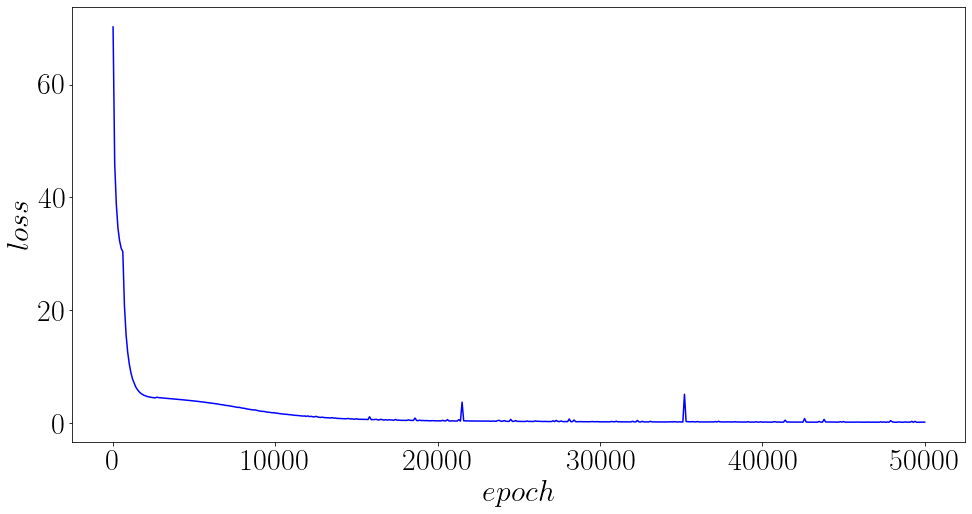

In [12]:
plt.plot(loss_history.steps, sum(numpy.array(loss_history.loss_train).T), 'b-')
plt.ylabel(r'$loss$')
plt.xlabel(r'$epoch$')
plt.savefig(f"{save_dir}/sir_pinn_loss", dpi=300)
plt.show()

After that, we look at how well the states were predicted. As an aid, the predictions can be presented together with the observations and the underlying true values.

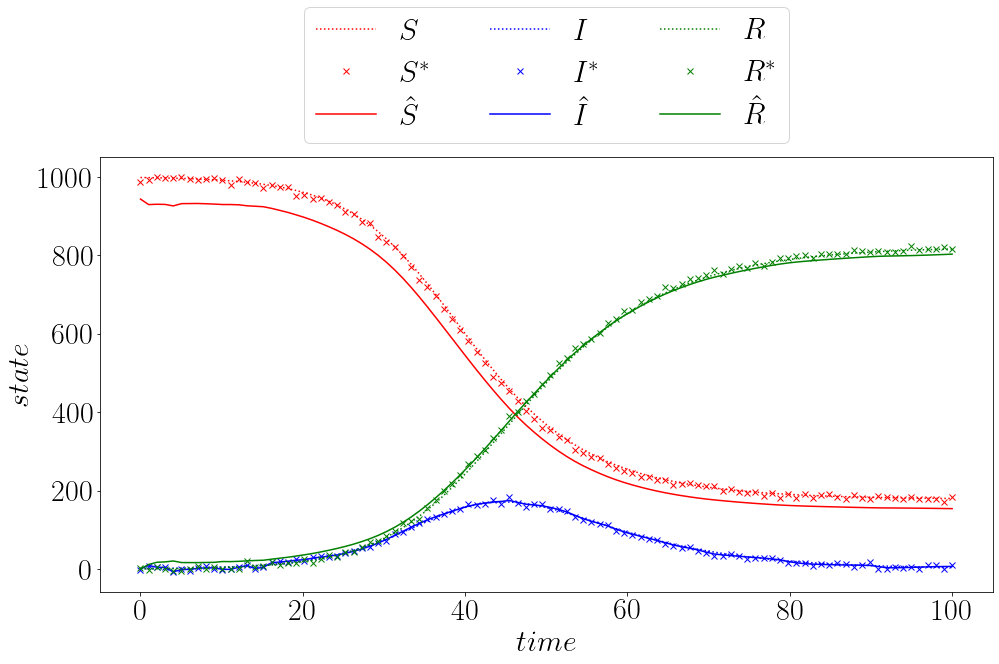

save figure to ../figures/sir/pinn/sir_pinn_progress


In [13]:
plot_progress(time=pinn.input_data['t'],
              observation=pinn.differential_equation.data,
              true=sir_true.data,
              prediction=pinn.predict(pinn.input_data['t']), 
              variables={'y_1': 'S', 'y_2': 'I', 'y_3': 'R'})
plot_progress(time=pinn.input_data['t'],
              observation=pinn.differential_equation.data,
              true=sir_true.data,
              prediction=pinn.predict(pinn.input_data['t']), 
              variables={'y_1': 'S', 'y_2': 'I', 'y_3': 'R'}, 
              save_path=f"{save_dir}/sir_pinn_progress")

Finally, we check how well the parameter estimation worked by plotting the development of the parameters over the epochs.
For comparison, the parameters with which the data were generated are also plotted.

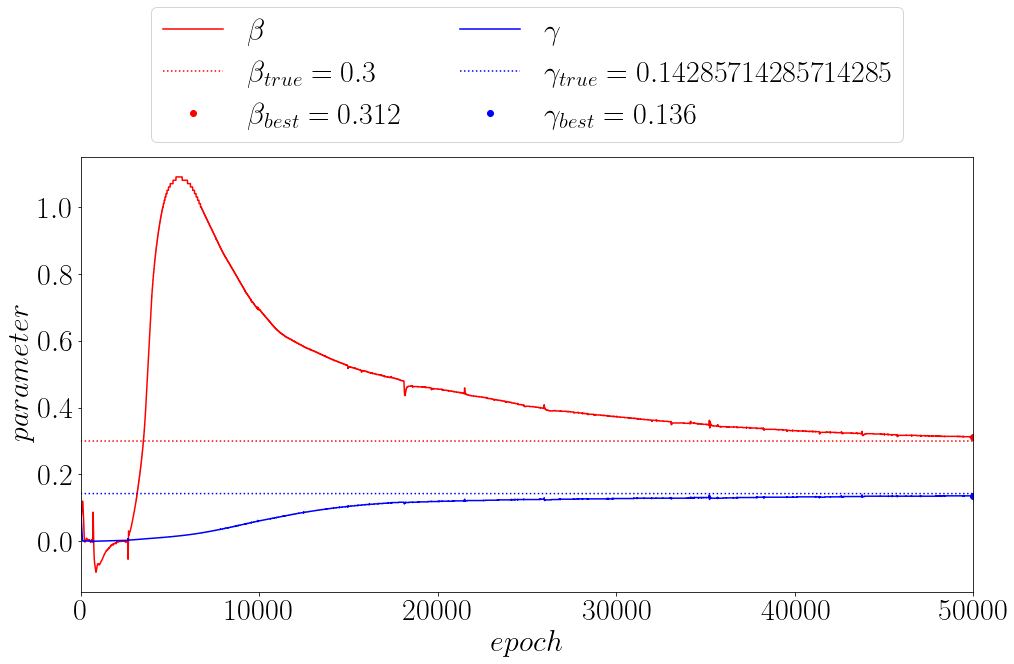

save figure to ../figures/sir/pinn/sir_pinn_param


In [14]:
plot_param_process(true_params=pinn.differential_equation.param, 
                   df_progress=pinn.get_param_history())
plot_param_process(true_params=pinn.differential_equation.param, 
                   df_progress=pinn.get_param_history(),
                   save_path=f"{save_dir}/sir_pinn_param")

The cost per state is: 19.295803810220665.


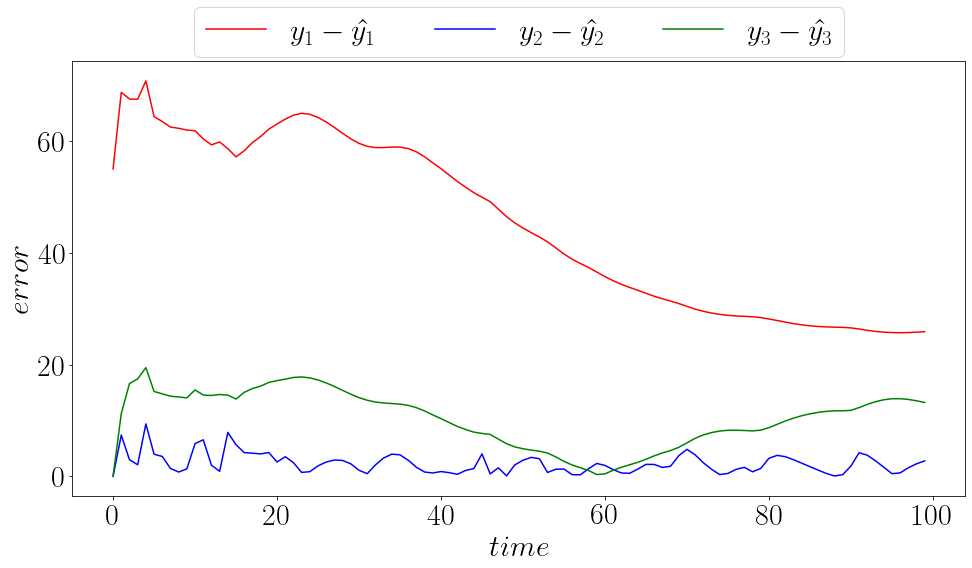

The cost per state is: 19.295803810220665.
save figure to ../figures/sir/pinn/sir_pinn_error


In [15]:
plot_error(sir_true.data, pinn.predict(pinn.input_data['t']), name='pinn')
plot_error(sir_true.data, pinn.predict(pinn.input_data['t']), name='pinn', 
           save_path=f"{save_dir}/sir_pinn_error")